In [1]:
# Importing libraries
import pandas as pd
import pickle
import numpy as np

In [2]:
#to read csv file to dataFrame
dataset = pd.read_csv('diabetes.csv')
dataset2 = pd.read_csv('diabetes-2.csv')

In [3]:
dataset.shape

(2000, 9)

In [4]:
dataset2.shape

(768, 9)

In [6]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [8]:
dataset2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


so here we call 2 differant dataset one for train and other for test


In [10]:
#split data to input and out comes

feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction'
                   , 'Age']
predicted_class = ['Outcome']

X = dataset[feature_columns]
y = dataset[predicted_class]

xx = dataset2[feature_columns]
yy = dataset2[predicted_class]

In [11]:
# Filling in the 0 values present with the mean of that particular property
from sklearn.impute import SimpleImputer
fill_values = SimpleImputer(missing_values=np.nan, strategy="mean")
X = fill_values.fit_transform(X)
xx = fill_values.fit_transform(xx)

<Axes: xlabel='Outcome', ylabel='count'>

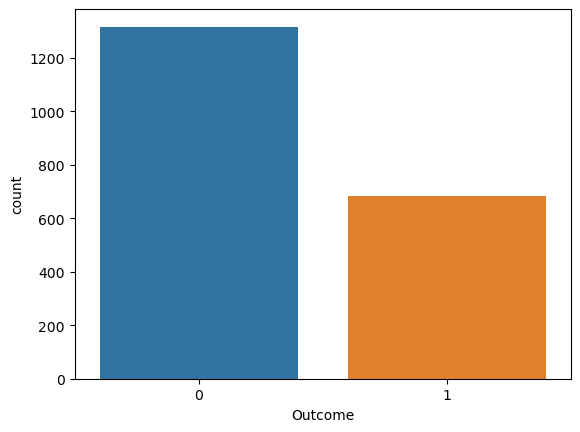

In [14]:
import seaborn
seaborn.countplot(x = 'Outcome' , data = dataset)

<Axes: xlabel='Outcome', ylabel='count'>

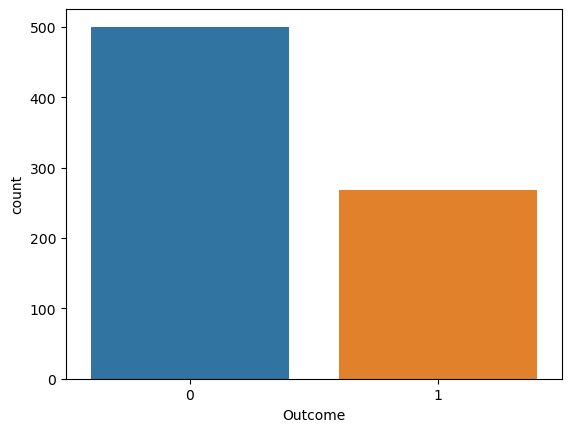

In [15]:
seaborn.countplot(x = 'Outcome' , data = dataset2)

In [16]:
#to train data with Random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200, random_state =1 , 
                            criterion="entropy",max_depth=200,
                            )
rf.fit(X, y.values.ravel())

RandomForestClassifier(criterion='entropy', max_depth=200, n_estimators=200,
                       random_state=1)

In [17]:
# predict data 
y_pred = rf.predict(xx)

In [25]:
# making confusion_matrix for predicting 
from sklearn.metrics import confusion_matrix
cm =  confusion_matrix(yy, y_pred)

acc=(cm[0][0]+cm[1][1])/(cm.sum())

<Axes: >

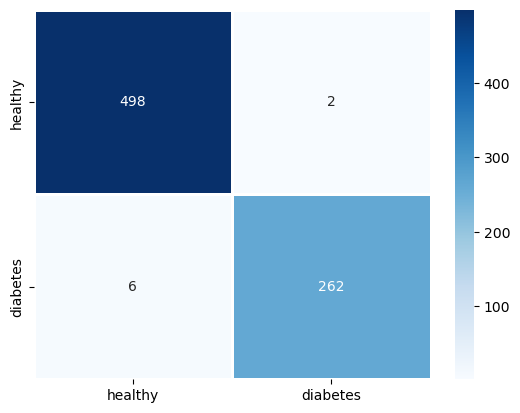

In [26]:
dataF_cm = pd.DataFrame(cm , index = ['healthy' , 'diabetes'] , columns=['healthy' , 'diabetes'])
seaborn.heatmap(dataF_cm , cmap = 'Blues' , linewidths=1 , fmt = 'g' , annot = True )


In [27]:
acc

0.9895833333333334